## Fragment length frequency and rescaling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the file
df = pd.read_csv('query.bed', sep='\t', comment='#', header=None, usecols=[1, 2], names=['start', 'end'])

# Calculating the fragment length
df['length'] = df['end'] - df['start']

# storing into a list
dna_seg = df['length'].tolist()

# finding frequency of each fragment length
freq_table = df['length'].value_counts().sort_index()

# Normalizing the frequencies
seg_sizes = freq_table.index.to_numpy()
counts = freq_table.values
total = counts.sum()
norm_freq = counts / total

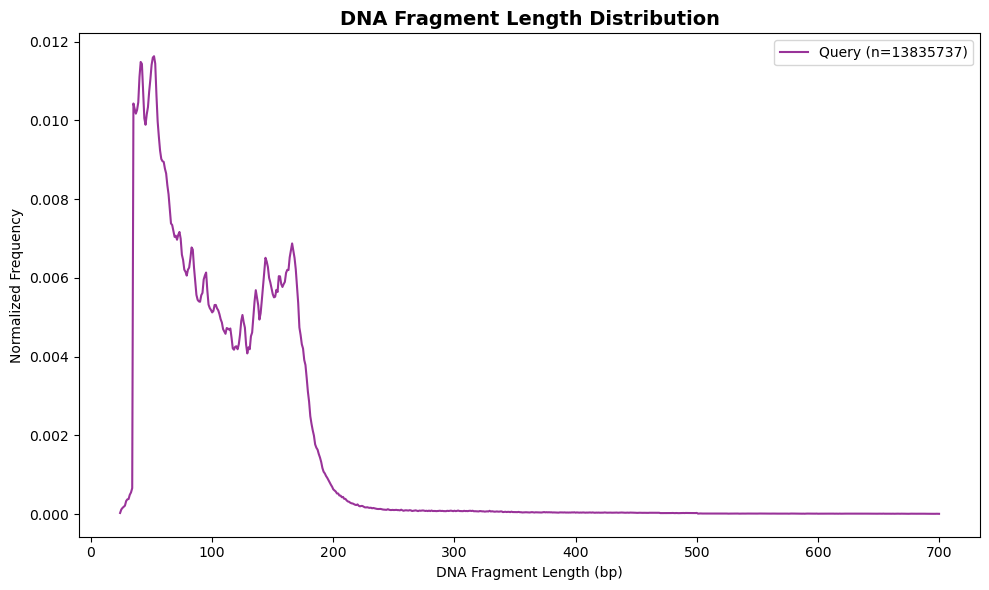

In [5]:
order = np.argsort(SEG_SIZES)
sorted_x = seg_sizes[order]
sorted_y = norm_freq[order]

plt.figure(figsize=(10, 6))
plt.plot(sorted_x, sorted_y, linestyle='-', alpha=0.8, color='purple', label=f'Query (n={total})')
plt.legend()
plt.xlabel('DNA Fragment Length (bp)')
plt.ylabel('Normalized Frequency')
plt.title('DNA Fragment Length Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
ref_df = pd.read_csv('reference.hist', sep=r'\s+', header=None, names=['s', 'f'])
ref_s = ref_df['s'].astype(int).to_numpy()
ref_f = ref_df['f'].to_numpy()

n = int(0.3 * len(dna_seg))
cnt = (ref_f / ref_f.sum()) * n
cnt = cnt.astype(int)

dna_df = pd.DataFrame(dna_seg, columns=['l'])
freq = dna_df['l'].value_counts().sort_index()
freq = freq.to_dict()

res = []

for s, t in zip(ref_s, cnt):
    a = freq.get(s, 0)
    if a == 0:
        continue
    k = min(a, t)
    res.extend([s] * k)
    freq[s] -= k

res_df = pd.DataFrame(res, columns=['l'])
tab = res_df['l'].value_counts().sort_index()

sizes = tab.index.to_numpy()
counts = tab.values
freqs = counts / counts.sum()

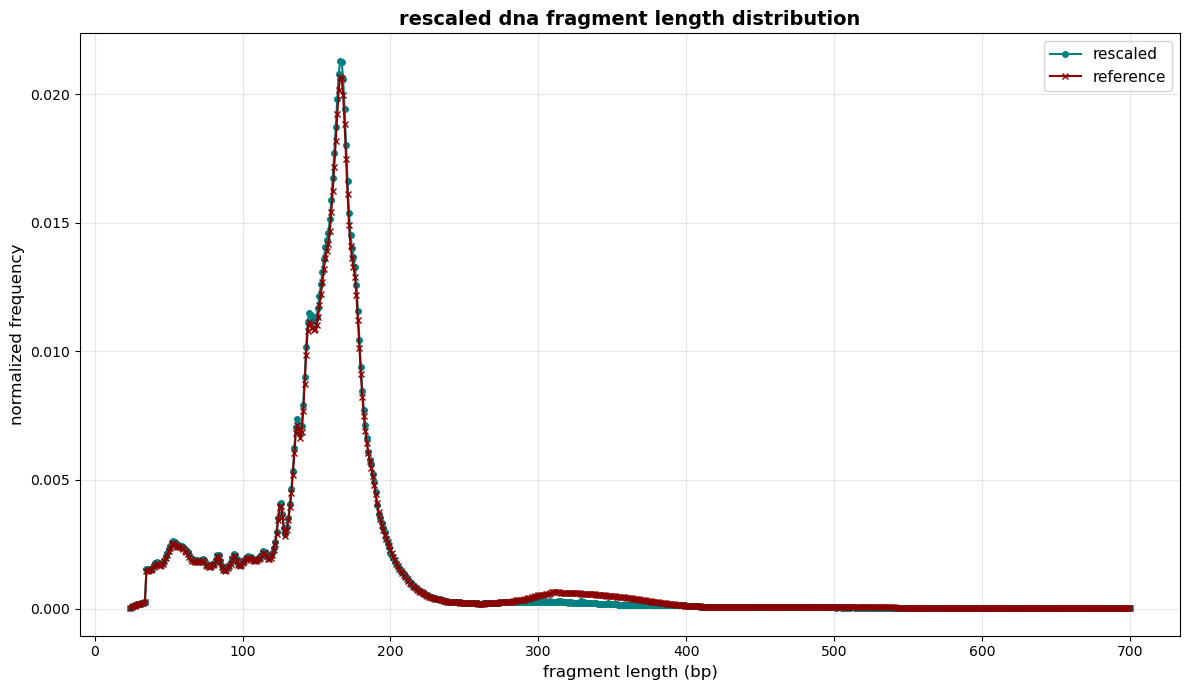

In [10]:
plt.figure(figsize=(12, 7))
plt.plot(sizes, freqs, 'o-', label='rescaled', markersize=4, color='teal')
plt.plot(ref_s, ref_f / ref_f.sum(), 'x-', label='reference', markersize=4, color='darkred')
plt.xlabel('fragment length (bp)', fontsize=12)
plt.ylabel('normalized frequency', fontsize=12)
plt.title('rescaled dna fragment length distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

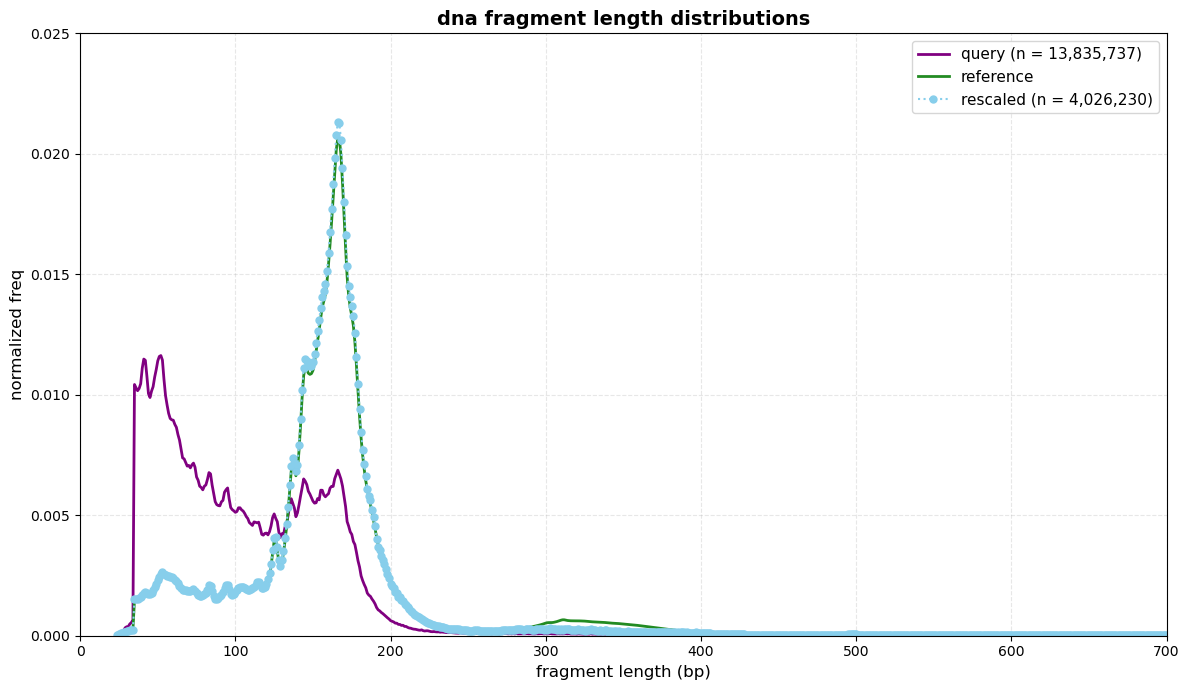

In [15]:
plt.figure(figsize=(12, 7))

q = np.argsort(seg_sizes)
plt.plot(seg_sizes[q], norm_freq[q], color='purple', linewidth=2, label=f'query (n = {len(dna_seg):,})')

r = np.argsort(ref_s)
plt.plot(ref_s[r], ref_f[r] / ref_f.sum(), color='forestgreen', linewidth=2, label='reference')

s = np.argsort(sizes)
plt.plot(sizes[s], freqs[s], marker='o', linestyle=':', linewidth=1.5, color='skyblue', markersize=5, label=f'rescaled (n = {len(res):,})')

plt.xlabel('fragment length (bp)', fontsize=12)
plt.ylabel('normalized freq', fontsize=12)
plt.title('dna fragment length distributions', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 700)
plt.ylim(0, 0.025)
plt.tight_layout()
plt.show()